In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform= ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


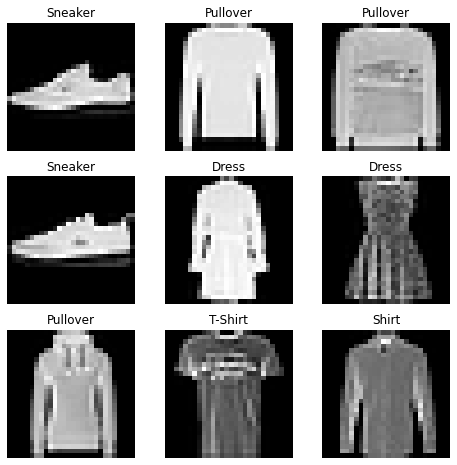

In [9]:
# 순환과 데이터 셋 시각화 -> matplotlib을 사용함 

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols , rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size = (1,)).item()
  # item()을 통해서 변수 타임 문자열로 반환한다
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap= 'gray')
plt.show()

# 커스텀 데이터 셋을 만드는 법
 

In [11]:
import os
import pandas as pd
from torchvision.io import read_image

In [12]:
# 커스텀 데이터 셋 만들기 위한 클래스는 반드시 __init__, __len__, __getitem__ 포함해야한다.

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    # 데이터 셋 오브젝트를 인스턴스화 시킴 
    # 이미지 데이터, 주석파일 변형 
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    # 데이터 셋의 샘플 길이를 반환한다 
    return len(sef.img_labels)
  
  def __getitem__(self, idx):
    # index (idx)를 통해 해당 샘플을 불러오고 반환하는 함수
    # read_img --> 이미지의 위치를 파악하고 텐서로 반환  
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labesl.iloc[idx, 1]
    if self.transform:
      # transform함수를 통해 텐서이미지와 라벨을 dictionary형으로 반환
      image = self.transform(image)
    if self.target_transform:
      label = self.trarget_transform(label)
    
    return image, label

# DataLoaders를 사용하여 데이터를 학습 시킴

In [14]:
#DataLoader --> 순환 가능한 객체 

from torch.utils.data import DataLoader


In [16]:
# batch_size --> 하나의 batch에 학습하는 데이터의 수
# shuffle    --> 데이터를 섞어서 사용하는지 설정, torch.manual_seed를 통해 고정하여 사용 가능
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


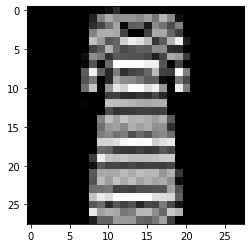

Lable: 3


In [20]:
# 이미지와 라벨 디스플레이
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
# sqeeze() --> 텐서에서 차원이 1인 경우 해당 차원을 제거한다. 
label= train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Lable: {label}')